Importando Dependências

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


d.1) separá-la nos canais RGB; 

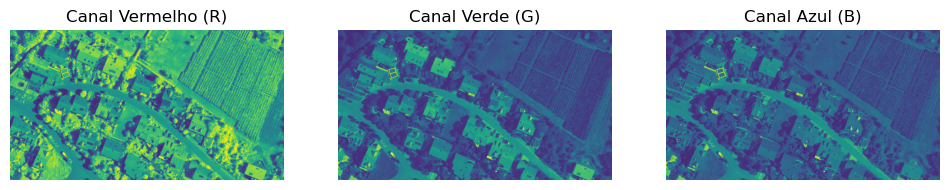

In [2]:
img = cv2.imread(r"C:\Users\ericd\PDI_novo\PDI II\pdi2_ime\trabalho_1\top_mosaic_09cm_area17.tif")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(img_rgb)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R)
plt.title("Canal Vermelho (R)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G)
plt.title("Canal Verde (G)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B)
plt.title("Canal Azul (B)")
plt.axis("off")

plt.show()


d.2) separá-la nos canais CMY;

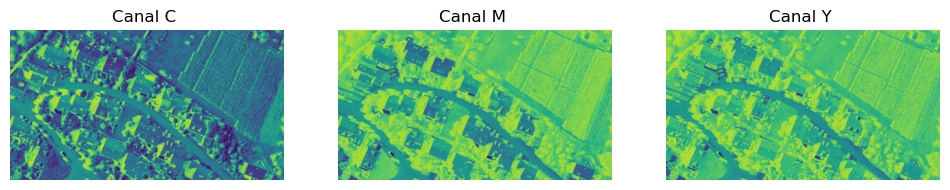

In [3]:
C = 255 - R
M = 255 - G
Y = 255 - B

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(C)
plt.title("Canal C ")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(M)
plt.title("Canal M ")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Y)
plt.title("Canal Y ")
plt.axis("off")

plt.show()

d.3) a partir da decomposição RBG, gerar uma imagem colorida; e

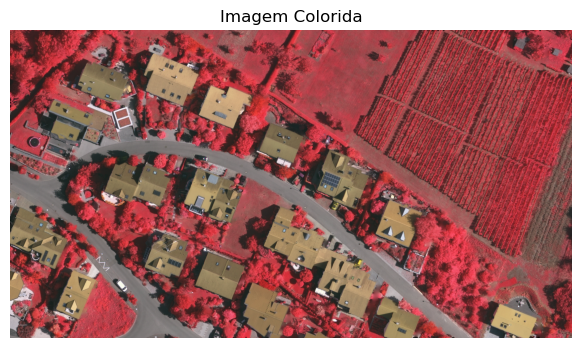

In [4]:
plt.figure(figsize=(12,4))

plt.subplot(1,1,1)
plt.imshow(img_rgb)
plt.title("Imagem Colorida")
plt.axis("off")

plt.show()

d.4) a partir da decomposição RGB, transformá-la em uma imagem HSI.

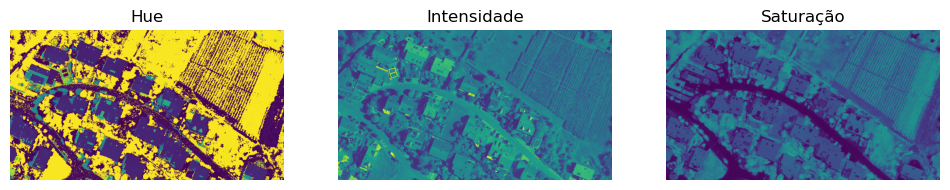

In [5]:
img_rgb = img_rgb.astype(np.float32) / 255.0

R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

I = (R + G + B) / 3.0

min_rgb = np.minimum(np.minimum(R, G), B)
S = 1 - (3 / (R + G + B + 1e-6)) * min_rgb

num = 0.5 * ((R - G) + (R - B))
den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-6

theta = np.arccos(num / den)

H = np.where(B <= G, theta, 2*np.pi - theta)

H = H / (2*np.pi)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(H)
plt.title("Hue")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(I)
plt.title("Intensidade")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(S)
plt.title("Saturação")
plt.axis("off")

plt.show()


d.5)a partir da decomposição RBG, transformá-la para o sistema específico do grupo.

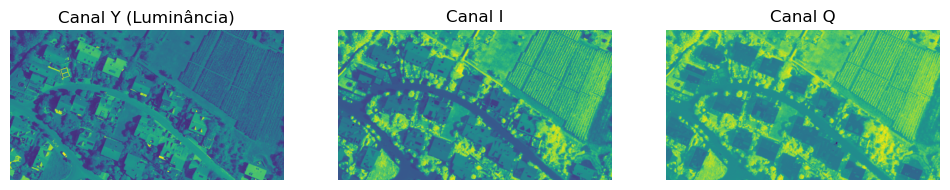

In [8]:
img_bgr = cv2.imread(r"C:\Users\ericd\PDI_novo\PDI II\pdi2_ime\trabalho_1\top_mosaic_09cm_area17.tif")

if img_bgr is None:
    print("Imagem não encontrada!")
    exit()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_rgb = img_rgb / 255.0

# Separar canais
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Converter para YIQ
Y = 0.299*R + 0.587*G + 0.114*B
I = 0.596*R - 0.275*G - 0.321*B
Q = 0.212*R - 0.523*G + 0.311*B

# Empilhar os canais YIQ (representação matricial)
yiq = np.stack((Y, I, Q), axis=2)

# Mostrar os canais
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(Y)
plt.title("Canal Y (Luminância)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(I)
plt.title("Canal I")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Q)
plt.title("Canal Q")
plt.axis("off")

plt.show()